In [ ]:
from google.colab import drive
drive.mount('content')

Mounted at content


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import string
import re
sns.set()

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'

In [ ]:
toys=pd.read_csv('/content/content/MyDrive/Amazon Capstone project/Main_vediogames.csv')
toys.head()

,Unnamed: 0,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,title,brand,main_cat,Polarity,Analysis
0,0,1.0,True,"06 9, 2014",A21ROB4YDOZA5P,0439381673,Mary M. Clark,used play game years ago loved it. found work ...,did not like this,1402272000,brand new learning company oregon trail th edi...,by learning company,video games,0.150000,Positive
1,1,3.0,True,"05 10, 2014",A3TNZ2Q5E7HTHD,0439381673,Sarabatya,game worked great story line videos would neve...,almost perfect,1399680000,brand new learning company oregon trail th edi...,by learning company,video games,0.210000,Positive
2,2,4.0,True,"02 7, 2014",A1OKRM3QFEATQO,0439381673,Amazon Customer,learn hard way ordering macbook pro work unles...,does not work with mac os unless it is 10.3 or...,1391731200,brand new learning company oregon trail th edi...,by learning company,video games,-0.038542,Negative
3,3,1.0,True,"02 7, 2014",A2XO1JFCNEYV3T,0439381673,ColoradoPartyof5,"product description state clearly. cd, box, pr...",does not work on mac osx,1391731200,brand new learning company oregon trail th edi...,by learning company,video games,-0.150000,Negative
4,4,4.0,True,"01 16, 2014",A19WLPIRHD15TH,0439381673,Karen Robinson,would recommend learning game anyone likes lea...,roughing it,1389830400,brand new learning company oregon trail th edi...,by learning company,video games,-0.200000,Negative


In [ ]:
toys.isnull().sum()

Unnamed: 0            0
overall               0
verified              0
reviewTime            0
reviewerID            0
asin                  0
reviewerName        219
reviewText          897
summary              39
unixReviewTime        0
title                51
brand             22988
main_cat           1332
Polarity              0
Analysis              0
dtype: int64

In [ ]:
toys.dropna(inplace= True)

In [ ]:
toys['Analysis'].value_counts()

Positive    2055598
Negative     545146
Neutral      215582
Name: Analysis, dtype: int64

In [ ]:
toys['Analysis'].value_counts(normalize= True)

Positive    0.729886
Negative    0.193566
Neutral     0.076547
Name: Analysis, dtype: float64

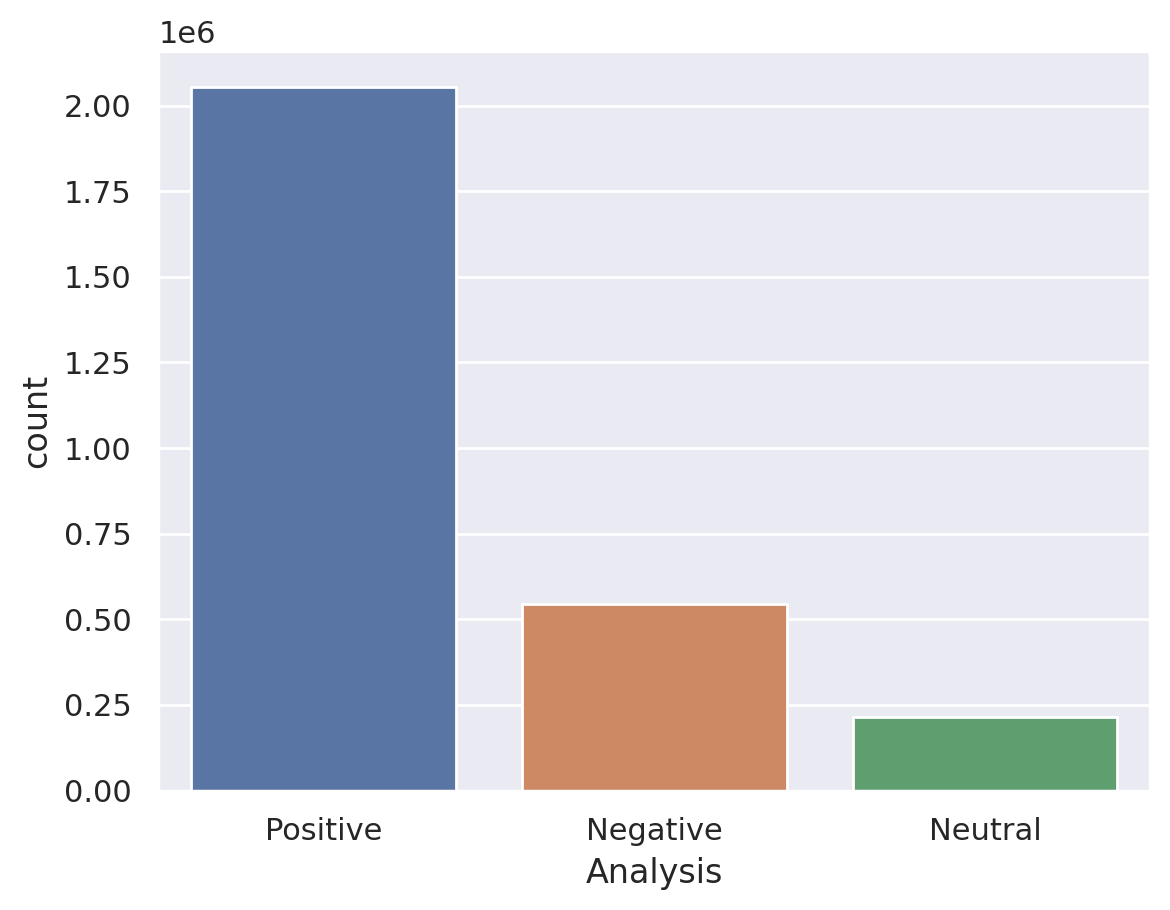

In [ ]:
sns.countplot(data= toys, x= 'Analysis',
             order = toys['Analysis'].value_counts().index);

In [ ]:
toys['text_n_chars'] = toys.reviewText.apply(len) # count all chars in each sentence
toys['text_n_words'] = toys.reviewText.apply(lambda sent: len(sent.split())) # count number

toys.head()

,Unnamed: 0,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,title,brand,main_cat,Polarity,Analysis,text_n_chars,text_n_words
0,0,1.0,True,"06 9, 2014",A21ROB4YDOZA5P,0439381673,Mary M. Clark,used play game years ago loved it. found work ...,did not like this,1402272000,brand new learning company oregon trail th edi...,by learning company,video games,0.150000,Positive,93,17
1,1,3.0,True,"05 10, 2014",A3TNZ2Q5E7HTHD,0439381673,Sarabatya,game worked great story line videos would neve...,almost perfect,1399680000,brand new learning company oregon trail th edi...,by learning company,video games,0.210000,Positive,106,18
2,2,4.0,True,"02 7, 2014",A1OKRM3QFEATQO,0439381673,Amazon Customer,learn hard way ordering macbook pro work unles...,does not work with mac os unless it is 10.3 or...,1391731200,brand new learning company oregon trail th edi...,by learning company,video games,-0.038542,Negative,275,41
3,3,1.0,True,"02 7, 2014",A2XO1JFCNEYV3T,0439381673,ColoradoPartyof5,"product description state clearly. cd, box, pr...",does not work on mac osx,1391731200,brand new learning company oregon trail th edi...,by learning company,video games,-0.150000,Negative,98,13
4,4,4.0,True,"01 16, 2014",A19WLPIRHD15TH,0439381673,Karen Robinson,would recommend learning game anyone likes lea...,roughing it,1389830400,brand new learning company oregon trail th edi...,by learning company,video games,-0.200000,Negative,92,13


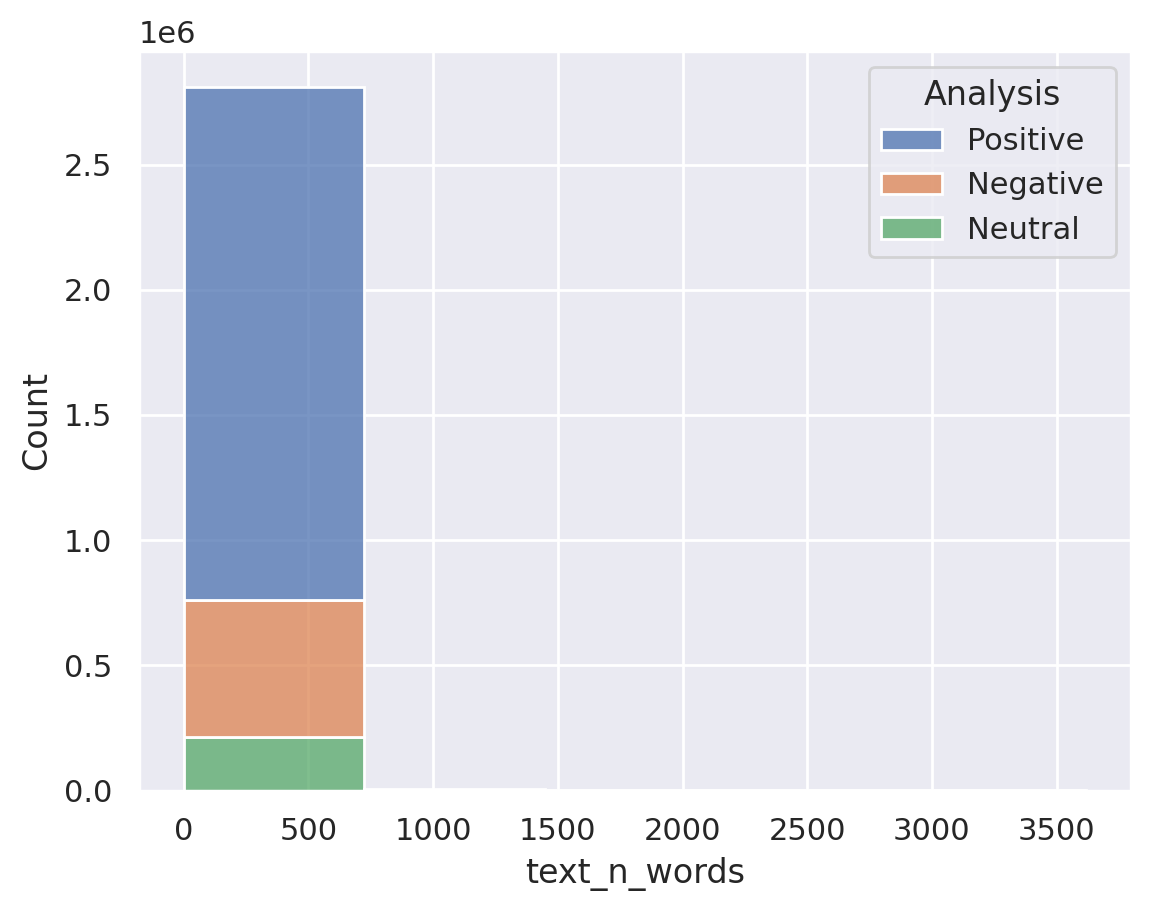

In [ ]:
sns.histplot(data= toys, x= 'text_n_words', hue= 'Analysis',bins=5,multiple= 'stack');

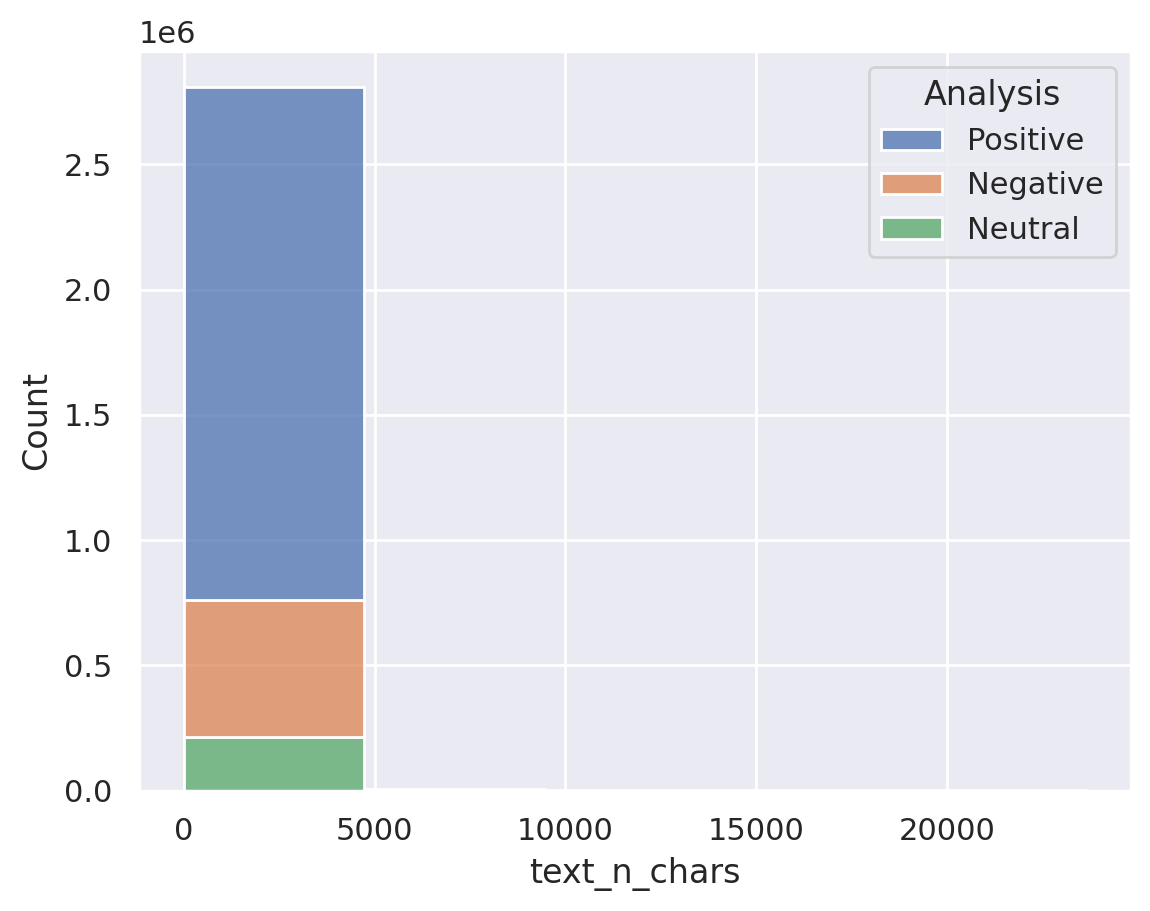

In [ ]:
sns.histplot(data= toys, x= 'text_n_chars', hue= 'Analysis', multiple= 'stack',bins=5);


In [ ]:
from collections import Counter

In [ ]:
words = [word for sent in toys['reviewText'] for word in sent.split()]
words[:10] # words without sorting

['used',
 'play',
 'game',
 'years',
 'ago',
 'loved',
 'it.',
 'found',
 'work',
 'computer']

In [ ]:
# sort words descending order
freq_words = Counter(words)
freq_words_sorted = sorted(freq_words.items(), key=lambda pair: pair[1], reverse=True)
freq_words_df = pd.DataFrame(freq_words_sorted[:20], columns=['word', 'counts'])

In [ ]:
freq_words_df.head(10)

,word,counts
0,game,2580680
1,like,941088
2,one,791432
3,get,752244
4,great,719310
5,play,636944
6,good,598478
7,games,572842
8,really,540489
9,game.,535636


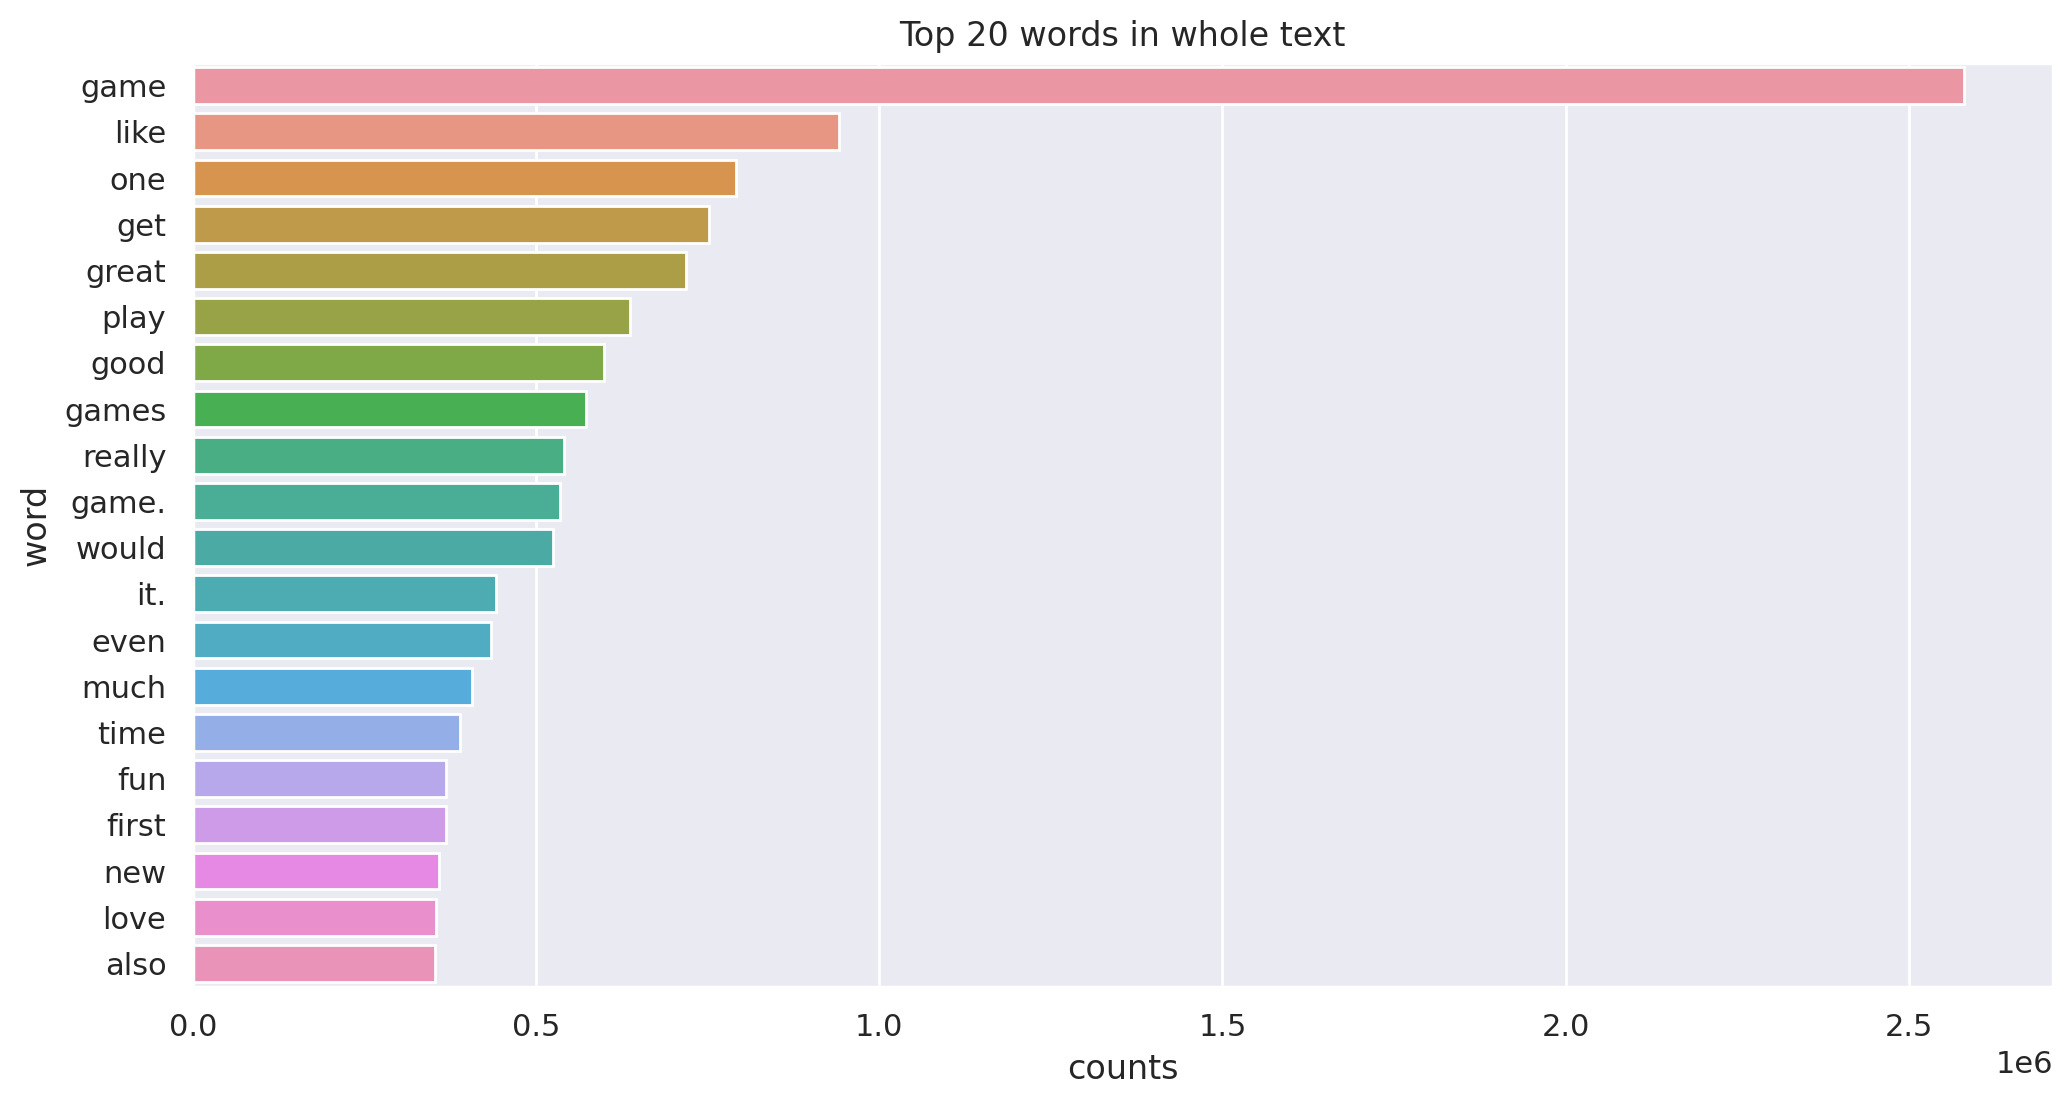

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data= freq_words_df , x= 'counts', y= 'word')
plt.title('Top 20 words in whole text')
plt.show();